<a href="https://colab.research.google.com/github/adidror005/youtube-videos/blob/main/HistoricalTradeDataAlpacaVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Watch My Intro Video on Alpaca to get Started

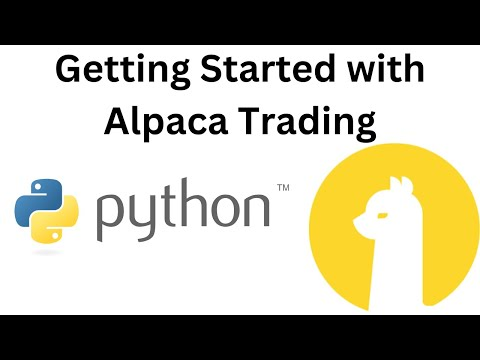

In [ ]:
from IPython.display import HTML, YouTubeVideo

YouTubeVideo(
    '2rh-hbeAQfQ', width=1200, height=600
)

# # 📈 Historical Trade Data Collection from Alpaca
#
# This notebook downloads historical trade data for a stock (e.g., AMD) using Alpaca's `alpaca-py` SDK,


# 🛠️ 1. Install Dependencies


In [ ]:
!pip install alpaca-py

# 🔐 2. Load API Keys (for Google Colab only)


In [ ]:
from google.colab import userdata
ALPACA_API_KEY = userdata.get('ALPACA_API_KEY')
ALPACA_SECRET_KEY = userdata.get('ALPACA_API_SECRET')

# 🔌 3. Set Up Alpaca Historical Data Client


In [ ]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockTradesRequest
from alpaca.data.timeframe import TimeFrame
stock_client = StockHistoricalDataClient(ALPACA_API_KEY, ALPACA_SECRET_KEY)

# Warmup Getting Trade Level Data Sample

In [ ]:
df=stock_client.get_stock_trades(
    StockTradesRequest(
        symbol_or_symbols=['AMD','INTC'],
        start = '2023-01-04',
        end = '2023-01-05'
    )
).df

In [ ]:
df

exchange  price  ...    conditions  tape
symbol timestamp                                         ...                    
AMD    2023-01-04 00:00:40.301291+00:00        D  63.98  ...     [@, T, I]     C
       2023-01-04 00:00:49.571656+00:00        D  63.96  ...        [@, T]     C
       2023-01-04 00:00:49.577836+00:00        P  63.98  ...  [@, F, T, I]     C
       2023-01-04 00:00:49.577836+00:00        P  63.96  ...  [@, F, T, I]     C
       2023-01-04 00:00:49.577836+00:00        P  63.96  ...  [@, F, T, I]     C
...                                          ...    ...  ...           ...   ...
INTC   2023-01-04 23:58:33.108315+00:00        P  27.68  ...        [@, T]     C
       2023-01-04 23:58:59.656769+00:00        P  27.68  ...        [@, T]     C
       2023-01-04 23:58:59.656769+00:00        P  27.68  ...     [@, T, I]     C
       2023-01-04 23:59:12.464227+00:00        P  27.68  ...     [@, T, I]     C
       2023-01-04 23:59:30.423482+00:00        D  27.69  ...     [@, T, I]     C

[457591 rows x 6 columns]

# Mount Google Drive to Save

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🗓️ 4. Define the Date Range and Chunk Size

In [ ]:
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo  # for timezone support
import os

# Define Eastern Time
eastern = ZoneInfo('US/Eastern')

# Make the datetimes timezone-aware in Eastern Time
start_date = datetime(2023, 1, 1, tzinfo=eastern)
end_date = datetime(2024, 1, 1, tzinfo=eastern)
chunk_size = timedelta(days=7)

# Define output diretory
output_dir="/content/drive/MyDrive/stock_data_youtube"
os.makedirs(output_dir, exist_ok=True)

### Example

In [ ]:
symbol='INTC'
chunk_start = start_date
while start_date<end_date:
    chunk_end = min(chunk_start+chunk_size,end_date)
    print(f"Downloading chunk: {chunk_start.date()} to {chunk_end.date()}")
    df=stock_client.get_stock_trades(
      StockTradesRequest(
          symbol_or_symbols=[symbol],
          start = chunk_start,
          end = chunk_end
      )
  ).df
    filename = f"{output_dir}/stock_trades_{chunk_start.date()}_{chunk_end.date()}.parquet"
    df.to_parquet(filename)
    print("Saved to:", filename)
    chunk_start = chunk_end


Saved to: /content/drive/MyDrive/stock_data_youtube/stock_trades_2023-01-01_2023-01-08.parquet
Saved to: /content/drive/MyDrive/stock_data_youtube/stock_trades_2023-01-08_2023-01-15.parquet


KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.read_parquet("/content/drive/MyDrive/stock_data_youtube/stock_trades_2023-01-01_2023-01-08.parquet")

In [ ]:
df

exchange   price  ...    conditions  tape
symbol timestamp                                          ...                    
INTC   2023-01-03 09:00:00.007962+00:00        K  26.550  ...     [@, T, I]     C
       2023-01-03 09:00:00.008750+00:00        K  26.570  ...     [@, T, I]     C
       2023-01-03 09:00:00.008754+00:00        K  26.550  ...     [@, T, I]     C
       2023-01-03 09:00:00.008856+00:00        K  26.550  ...     [@, T, I]     C
       2023-01-03 09:00:00.009634+00:00        K  26.550  ...     [@, T, I]     C
...                                          ...     ...  ...           ...   ...
       2023-01-06 22:55:02.229024+00:00        D  28.730  ...        [@, T]     C
       2023-01-06 22:55:27.307563+00:00        T  28.730  ...  [@, F, T, I]     C
       2023-01-06 22:56:28.880921+00:00        K  28.740  ...     [@, T, I]     C
       2023-01-06 22:56:45.653421+00:00        D  28.735  ...     [@, T, I]     C
       2023-01-06 22:56:55.514513+00:00        K  28.740  ...     [@, T, I]     C

[646279 rows x 6 columns]


# 📦 5. Download Trade Data in Chunks  (Saved as Parquet)

In [ ]:
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo  # for timezone support
import os

symbol = "INTC"  # Change this to any valid symbol
partial = False
i = 0
max_i = 250
current_date = start_date

while current_date < end_date:
    i += 1
    if i == max_i:
        break
    if current_date + chunk_size > end_date:
        partial = True
        next_date = end_date
    else:
        next_date = current_date + chunk_size
    print(f"\n⏳ Downloading chunk {i}: {current_date.date()} to {next_date.date()}")

    if not partial:
        filename = f"{output_dir}/stock_trades_{current_date.date()}_{next_date.date()}.parquet"
    else:
        filename = f"{output_dir}/stock_trades_{current_date.date()}_{next_date.date()}_partial.parquet"

    if os.path.exists(filename):
        print("✅ Already exists in Google Drive, skipping.")
        current_date = next_date
        continue

    trades_request = StockTradesRequest(
        symbol_or_symbols=symbol,
        start=current_date,
        end=next_date
    )

    try:
        stock_trades = stock_client.get_stock_trades(trades_request)
        stock_trades.df.to_parquet(filename)  # Save directly to Google Drive
        print("✅ Saved to:", filename)

    except Exception as e:
        print("❌ Error:", e)

    current_date = next_date


⏳ Downloading chunk 1: 2022-01-01 to 2022-01-08
✅ Saved to: /content/drive/My Drive/stock_trades_daily_NEW/stock_trades_2022-01-01_2022-01-08.parquet

⏳ Downloading chunk 2: 2022-01-08 to 2022-01-10
✅ Saved to: /content/drive/My Drive/stock_trades_daily_NEW/stock_trades_2022-01-08_2022-01-10_partial.parquet


### Incremental Dollar Bars + EWMs
* https://www.interactivebrokers.com/en/trading/tradeConditions.php
* https://polygon.io/glossary/trade-conditions
* https://www.ctaplan.com/publicdocs/ctaplan/CTS_Pillar_Output_Specification.pdf?ref=alpaca.markets
* https://alpaca.markets/learn/stock-minute-bars

### Read Files from Parquet